# Titanic
- pandas의 groupby 외에도 pivot_table을 사용하면 직관적으로 데이터를 해석할 수 있다

## 1. 데이터 가져오기
- seaborn 패키지를 통해 titanic 데이터를 가져올 수 있다

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Groupby를 이용한 집계

성별에 따른 생존자 비율

In [3]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


성별과 클래스(1등급, 2등급, 3등급)에 따른 생존자 비율

In [4]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## 3. Pivot Table을 이용한 집계

pivot table을 이용하면 위와 같은 데이터를 간편하게 얻을 수 있다

In [5]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


성별, 클래스 뿐만 아니라 나이 범위까지 포함한 데이터를 multi index로 표현할 수 있다

In [6]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

pd.qcut을 활용하면 원하는 갯수만큼 범위를 자동 계산해준다

In [7]:
# 요금을 2단계로 나누기
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

집계 함수를 인자를 통해 지정할 수 있다
- survived : sum
- fare : mean

In [8]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': 'sum', 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

margin 옵션을 사용하면 total을 자동 계산해준다
- margins_name 옵션을 통해 칼럼명을 지정할 수 있으며, 디폴트는 'All'

In [9]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name='Total')

class,First,Second,Third,Total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


## 4. 그래프로 나타낸 수치

- 성별과 클래스에 따른 생존자 비율
    - 1, 2 class 여성은 압도적으로 높고, 남성은 대체적으로 낮음을 볼 수 있다

Text(0, 0.5, 'total survived')

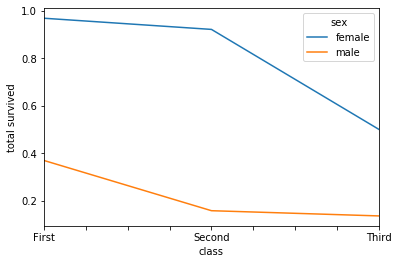

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.pivot_table('survived', index='class', columns='sex', aggfunc='mean').plot()
plt.ylabel('total survived')

In [11]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


나이와 클래스에 따른 생존자 비율
- 성인에 비해 미성년자가, 클래스가 높을 수록 생존비율이 높다

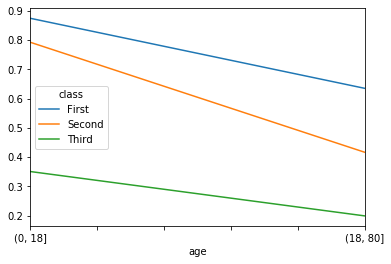

In [12]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', age, 'class').plot()